# MMS quaternion coordinate transformations

This notebook demonstrates how to transform vectors using the MMS MEC quaternions

Internally, the transformations are done by routines inside SpacePy (https://spacepy.github.io/)

In [ ]:
!pip install pyspedas

We'll also need to install SpacePy to get started

In [ ]:
!pip install spacepy

Import PySPEDAS and load some MMS MEC data for October 16, 2015

In [3]:
import pyspedas

In [4]:
pyspedas.mms.mec()

SDC username (blank for public access): 


31-May-22 21:29:20: Downloading mms1_mec_srvy_l2_epht89q_20151016_v2.0.0.cdf to pydata/mms1/mec/srvy/l2/epht89q/2015/10


Loaded variables:
mms1_mec_dipole_tilt
mms1_mec_gmst
mms1_mec_mlat
mms1_mec_mlt
mms1_mec_l_dipole
mms1_mec_quat_eci_to_bcs
mms1_mec_quat_eci_to_dbcs
mms1_mec_quat_eci_to_dmpa
mms1_mec_quat_eci_to_smpa
mms1_mec_quat_eci_to_dsl
mms1_mec_quat_eci_to_ssl
mms1_mec_L_vec
mms1_mec_Z_vec
mms1_mec_P_vec
mms1_mec_L_phase
mms1_mec_Z_phase
mms1_mec_P_phase
mms1_mec_kp
mms1_mec_dst
mms1_mec_earth_eclipse_flag
mms1_mec_moon_eclipse_flag
mms1_mec_r_eci
mms1_mec_v_eci
mms1_mec_r_gsm
mms1_mec_v_gsm
mms1_mec_quat_eci_to_gsm
mms1_mec_r_geo
mms1_mec_v_geo
mms1_mec_quat_eci_to_geo
mms1_mec_r_sm
mms1_mec_v_sm
mms1_mec_quat_eci_to_sm
mms1_mec_r_gse
mms1_mec_v_gse
mms1_mec_quat_eci_to_gse
mms1_mec_r_gse2000
mms1_mec_v_gse2000
mms1_mec_quat_eci_to_gse2000
mms1_mec_geod_lat
mms1_mec_geod_lon
mms1_mec_geod_height
mms1_mec_r_sun_de421_eci
mms1_mec_r_moon_de421_eci
mms1_mec_fieldline_type
mms1_mec_bsc_gsm
mms1_mec_loss_cone_angle_s
mms1_mec_loss_cone_angle_n
mms1_mec_pfs_geod_latlon
mms1_mec_pfn_geod_latlon
mms1_m

['mms1_mec_dipole_tilt',
 'mms1_mec_gmst',
 'mms1_mec_mlat',
 'mms1_mec_mlt',
 'mms1_mec_l_dipole',
 'mms1_mec_quat_eci_to_bcs',
 'mms1_mec_quat_eci_to_dbcs',
 'mms1_mec_quat_eci_to_dmpa',
 'mms1_mec_quat_eci_to_smpa',
 'mms1_mec_quat_eci_to_dsl',
 'mms1_mec_quat_eci_to_ssl',
 'mms1_mec_L_vec',
 'mms1_mec_Z_vec',
 'mms1_mec_P_vec',
 'mms1_mec_L_phase',
 'mms1_mec_Z_phase',
 'mms1_mec_P_phase',
 'mms1_mec_kp',
 'mms1_mec_dst',
 'mms1_mec_earth_eclipse_flag',
 'mms1_mec_moon_eclipse_flag',
 'mms1_mec_r_eci',
 'mms1_mec_v_eci',
 'mms1_mec_r_gsm',
 'mms1_mec_v_gsm',
 'mms1_mec_quat_eci_to_gsm',
 'mms1_mec_r_geo',
 'mms1_mec_v_geo',
 'mms1_mec_quat_eci_to_geo',
 'mms1_mec_r_sm',
 'mms1_mec_v_sm',
 'mms1_mec_quat_eci_to_sm',
 'mms1_mec_r_gse',
 'mms1_mec_v_gse',
 'mms1_mec_quat_eci_to_gse',
 'mms1_mec_r_gse2000',
 'mms1_mec_v_gse2000',
 'mms1_mec_quat_eci_to_gse2000',
 'mms1_mec_geod_lat',
 'mms1_mec_geod_lon',
 'mms1_mec_geod_height',
 'mms1_mec_r_sun_de421_eci',
 'mms1_mec_r_moon_de421_eci

Import `mms_qcotrans` (the quaternion transformation routine)

In [5]:
from pyspedas.mms.cotrans.mms_qcotrans import mms_qcotrans

Now transform the MMS velocity data from GEO coordinates to SM coordinates. 

The first argument to `mms_qcotrans` is the name of the variable containing the vector data to be transformed; the second argument is the output variable name. If the `in_coord` keyword isn't specified, we'll try to determine it from the input variable's metadata. The `out_coord` keyword is required. 

In [6]:
mms_qcotrans('mms1_mec_v_geo', 'mms1_mec_v_geo_2sm', out_coord='sm')

['mms1_mec_v_geo_2sm']

In [7]:
from pytplot import tplot

Now we can compare the official velocity data in SM coordinates (first panel) with velocity data we just transformed from the GEO data (second panel) and the original velocity data in GEO coordinates (last panel).

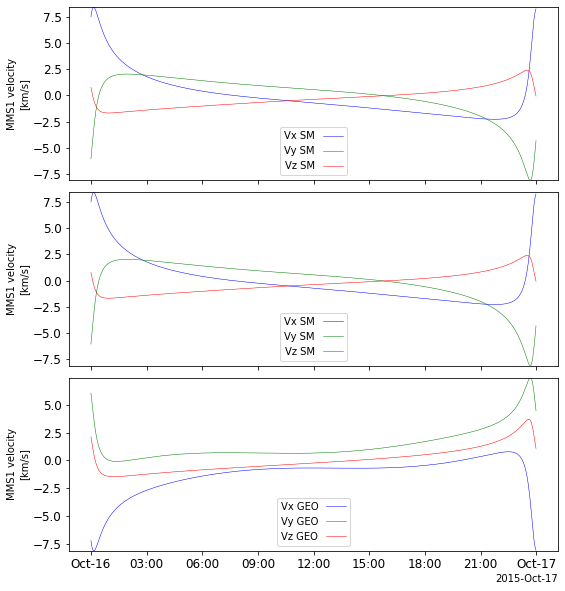

In [8]:
tplot(['mms1_mec_v_sm', 'mms1_mec_v_geo_2sm', 'mms1_mec_v_geo'])

We can easily transform to GSM coordinates

In [9]:
mms_qcotrans('mms1_mec_v_geo', 'mms1_mec_v_geo_2gsm', out_coord='gsm')

['mms1_mec_v_geo_2gsm']

Now we can do the same comparison as last time: the official velocity data are shown in GSM coordinates (first panel) with velocity data we just transformed from the GEO data (second panel) and the original velocity data in GEO coordinates (last panel).

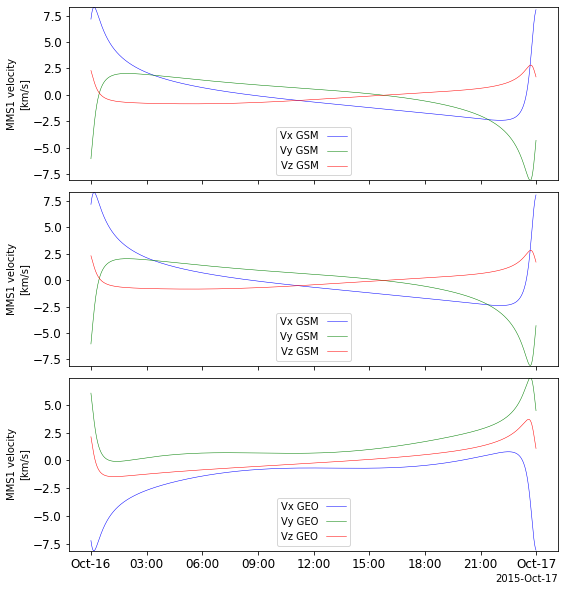

In [10]:
tplot(['mms1_mec_v_gsm', 'mms1_mec_v_geo_2gsm', 'mms1_mec_v_geo'])

And we can transform to GSE:

In [11]:
mms_qcotrans('mms1_mec_v_geo', 'mms1_mec_v_geo_2gse', out_coord='gse')

['mms1_mec_v_geo_2gse']

Note: same comparison as above. The transformed data match the official data.

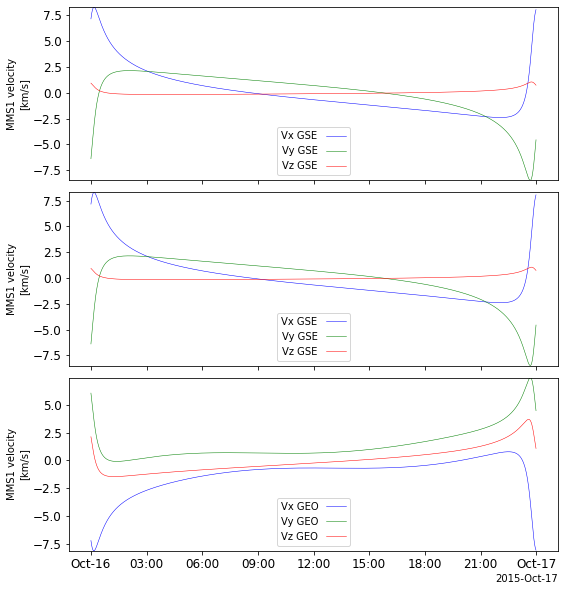

In [12]:
tplot(['mms1_mec_v_gse', 'mms1_mec_v_geo_2gse', 'mms1_mec_v_geo'])